Temel kütüphaneleri import ederek başlıyorum.

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
car_dataset = pd.read_csv('ford.csv')

Burada kullanılmış Ford marka araçların özelliklerini inceleyerek fiyat tahmininde bulunan bir model geliştiriyoruz. Veri setine https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction adresinden ulaşabilirsiniz.

In [166]:
car_dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


Veri setinin ilk 5 satırını görüntüsü bu şekildedir.

In [167]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


Veri seti 17966 satır, 9 sütündan oluşmaktadır. Yalnız 3 sütunun veri tipi metin şeklindedir.

In [169]:
print(car_dataset.model.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.fuelType.value_counts())

model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64
transmission
Manual       15518
Automatic     1361
Semi-Auto     1087
Name: count, dtype: int64
fuelType
Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


Metin türündeki değişkenler sayısal değerler dönüştürülmek için incelenmiştir.

In [170]:
# "fuelType" sütununu sayılaştırma
car_dataset.replace({'fuelType':{'Petrol':0,'Diesel':1,'Hybrid':2,'Electric':3,'Other':1}},inplace=True)

# En sık geçen 10 modeli al
top_10_models = car_dataset["model"].value_counts().head(10).index.tolist()
# Model isimlerini 0-9 arası numaralandır
model_mapping = {model: i for i, model in enumerate(top_10_models)}
# Geri kalanları 10 olarak numaralandır
car_dataset["model"] = car_dataset["model"].apply(lambda x: model_mapping.get(x, 10))

# "transmission" sütununu sayılaştırma
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1,'Semi-Auto':2}},inplace=True)

<ipython-input-170-1f943fa191f6>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuelType':{'Petrol':0,'Diesel':1,'Hybrid':2,'Electric':3,'Other':1}},inplace=True)
<ipython-input-170-1f943fa191f6>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'transmission':{'Manual':0,'Automatic':1,'Semi-Auto':2}},inplace=True)


Modelin çalışabilmesi için, metin türündeki değişkenler sayısal değerlere dönüştürülmüştür.



In [171]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  int64  
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  int64  
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  int64  
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 1.2 MB


Artık tüm sütunların sayısal değerlerden oluşmaktadır. Bu sayede veri seti kullanacağım modellerle kullanılabilir hale getirilmiştir.

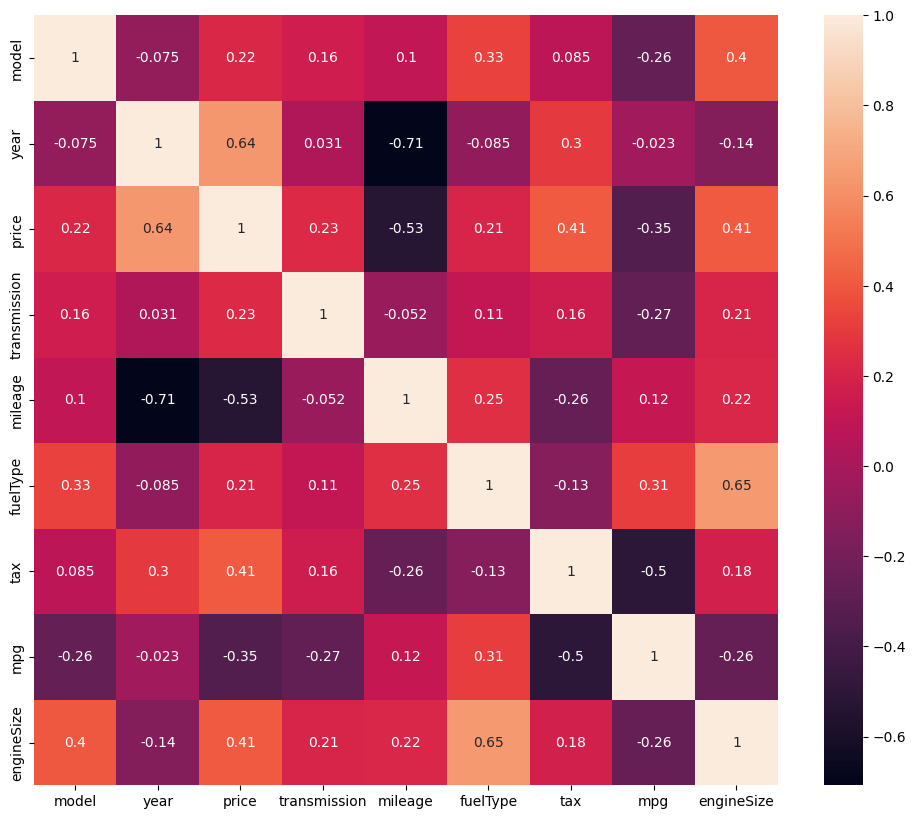

In [172]:

corr_matrix = car_dataset.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Düşük korelasyon tespit etmediğimiz için tüm özellikleri tutmaya karar verdim.

In [173]:
X = car_dataset.drop(['price'],axis=1)
Y = car_dataset['price']

Burada bağımsız değişken(X) price dışındaki tüm özellikleri temsil etmektedir. Bağımlı değişken(Y) ise price olarak belirlenmiştir. Amacımız X'e göre Y'yi tahmin etmektir.

In [174]:
print(X)

       model  year  transmission  mileage  fuelType  tax   mpg  engineSize
0          0  2017             1    15944         0  150  57.7         1.0
1          1  2018             0     9083         0  150  57.7         1.0
2          1  2017             0    12456         0  150  57.7         1.0
3          0  2019             0    10460         0  145  40.3         1.5
4          0  2019             1     1482         0  145  48.7         1.0
...      ...   ...           ...      ...       ...  ...   ...         ...
17961      7  2017             0    16700         0  150  47.1         1.4
17962      7  2014             0    40700         0   30  57.7         1.0
17963      1  2015             0     7010         1   20  67.3         1.6
17964     10  2018             0     5007         0  145  57.7         1.2
17965     10  2015             0     5007         0   22  57.7         1.0

[17966 rows x 8 columns]


In [175]:
print(Y)

0        12000
1        14000
2        13000
3        17500
4        16500
         ...  
17961     8999
17962     7499
17963     9999
17964     8299
17965     8299
Name: price, Length: 17966, dtype: int64


Yukarıda X ve Y'nin nasıl ayrıldığını görüntülüyoruz.

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Bu kütüphaneler, veriyi bölme, lineer model oluşturma ve modelin doğruluğunu ölçme  işlemleri için kullanılmıştır. Modelin hem eğitimi hem de test edilmesi için gereklidir.

In [177]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)


X_train ve Y_train, modelin öğrenmesi için kullanılacak veri setidir.
X_test ve Y_test modelin görmediği ve tahmin gücünü ölçmek için kullanılacak veri setidir.
test_size = 0.1 olduğu için verinin %10'u test, %90'ı eğitim için kullanılacaktır.

In [178]:
lin_reg_model = LinearRegression()

In [179]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Bu işlemler sonucunda modelimiz, değişkenler ile fiyat arasındaki doğrusal ilişkiyi öğrenmiş oldu.

In [180]:
training_data_prediction = lin_reg_model.predict(X_train)

Burada lineer regresyon modelimiz için tahmin yapılmıştır.

In [181]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R² Skoru: ", error_score)

R² Skoru:  0.7368112033431778


Modelin başarısı R² skoru ile ölçülmüştür. Bu metodda sonuç 1'e ne kadar yakınsa modelimizin o kadar güçlü olduğunu gösterir. 0.73 oldukça iyi bir sonuçtur.

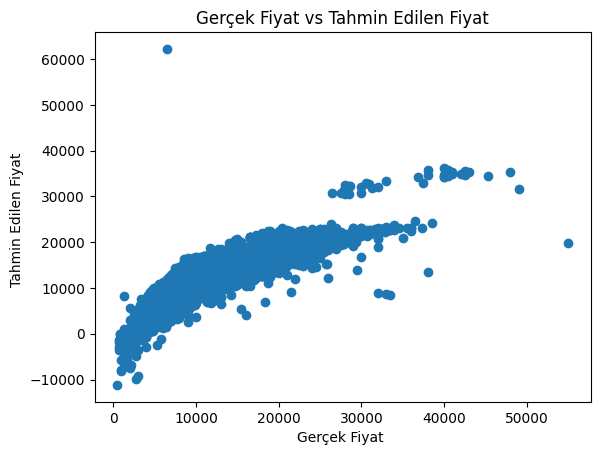

In [182]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Gerçek Fiyat ")
plt.ylabel("Tahmin Edilen Fiyat ")
plt.title("Gerçek Fiyat vs Tahmin Edilen Fiyat")
plt.show()


X ekseninde gerçek araç fiyatları, Y ekseninde ise modelin tahmin ettiği fiyatlar yer almaktadır.  
Noktaların büyük kısmı 45°'lik doğruya yakın konumlanmıştır. Bu durum modelin genel olarak fiyatları başarılı şekilde tahmin ettiğini gösterir.
Ayrıca, düşük ve yüksek fiyat uçlarında sapmalar gözlemlenmektedir. Bu durum, linear regresyonun uç değerleri yakalamakta zorlandığını göstermektedir.

In [183]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

Bu kez, random forest kullanarak tahmin etmeye çalışan bir model oluşturalım.

In [184]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)


In [185]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=2)

Model 100 adet karar ağacından oluşuyor.



In [186]:
random_forest_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=2)

Bu işlemler sonucunda modelimiz değişkenler ile fiyat arasındaki ilişkiyi öğrenmiş oldu.

In [187]:
training_data_prediction_rf = random_forest_model.predict(X_test)

Burada random forest regresyon modelimiz için tahmin yapılmıştır.

In [188]:
error_rf_score = metrics.r2_score(Y_test, training_data_prediction_rf)
print("R² Skoru:", error_rf_score)

R² Skoru: 0.929603333427553


R² Skoru lineer regresyona göre 1'e çok daha yakındır. Bu random forest modelinin çok daha iyi sonuç verdiğini gösterir.

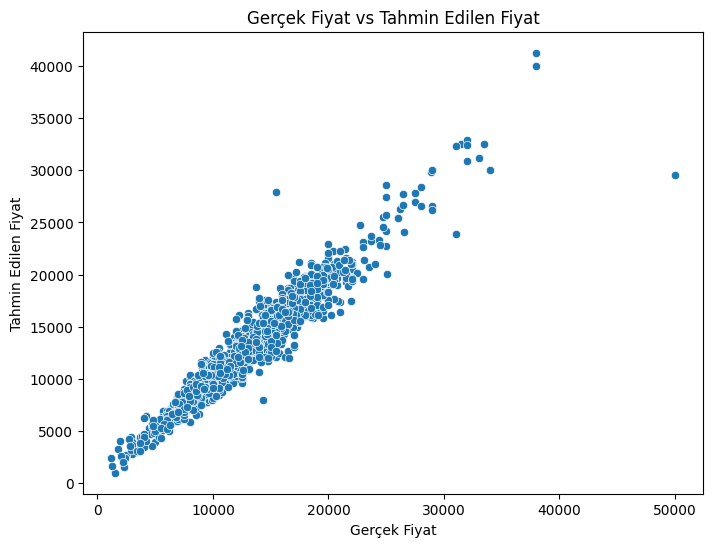

In [189]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_test, y=Y_pred)
plt.xlabel("Gerçek Fiyat")
plt.ylabel("Tahmin Edilen Fiyat")
plt.title("Gerçek Fiyat vs Tahmin Edilen Fiyat")
plt.show()

Noktalar 45°'lik doğruya çok daha yakın çevrede yoğunlaşmıştır. Bu modelin yüksek doğrulukta tahminler yaptığını gösterir.
Lineer regresyon modeline kıyasla Random Forest, fiyat aralığının neredeyse tamamında daha başarılı tahminler yapmıştır.
Ayrıca yüksek fiyatlı araçlarda sapma azalmıştır

Bu nedenle, veri setinin yapısına Random Forest Regressor daha uygun olduğu görülmüştür.